* Article https://www.pyimagesearch.com/2017/09/11/object-detection-with-deep-learning-and-opencv/
* OpenCV docs https://docs.opencv.org/master/d2/d58/tutorial_table_of_content_dnn.html
* Note that the models are [bundled in openCV_extra](https://github.com/opencv/opencv_extra/tree/master/testdata/dnn) but the ones in this example [are here](https://github.com/marno1d/TurtleBot_Follower)

The model we’ll be using in this blog post is a Caffe version of the original TensorFlow implementation by Howard et al. and was trained by chuanqi305 (see GitHub).

The MobileNet SSD was first trained on the COCO dataset (Common Objects in Context) and was then fine-tuned on PASCAL VOC reaching 72.7% mAP (mean average precision).

We can therefore detect 20 objects in images (+1 for the background class), including airplanes, bicycles, birds, boats, bottles, buses, cars, cats, chairs, cows, dining tables, dogs, horses, motorbikes, people, potted plants, sheep, sofas, trains, and tv monitors.

In [1]:
!ls /Users/robin/Github/TurtleBot_Follower/

LICENSE                          cv_command_dnn.py
MobileNetSSD_deploy.caffemodel   cv_command_hog.py
MobileNetSSD_deploy.prototxt.txt turtlebot_vo.py
README.md


In [2]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

In [3]:
cv2.__version__

'4.1.2'

initialize class labels and bounding box colors:

In [4]:
CLASSES = ["background", "aeroplane", "bicycle", "bird", "boat",
"bottle", "bus", "car", "cat", "chair", "cow", "diningtable",
"dog", "horse", "motorbike", "person", "pottedplant", "sheep",
"sofa", "train", "tvmonitor"]
COLORS = np.random.uniform(0, 255, size=(len(CLASSES), 3))

In [5]:
image_file = 'people.jpg'

In [6]:
image = cv2.imread(image_file)
type(image)

numpy.ndarray

In [7]:
image.shape

(400, 600, 3)

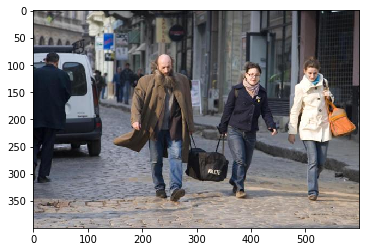

In [8]:
plt.imshow(image[:,:,::-1]);

Resize as 300 x 300

In [9]:
(h, w) = image.shape[:2]
blob = cv2.dnn.blobFromImage(cv2.resize(image, (300, 300)), 0.007843,(300, 300), 127.5)

In [10]:
type(blob)

numpy.ndarray

In [11]:
blob.shape

(1, 3, 300, 300)

Now we need to load our dnn model:

In [12]:
model_dir = '/Users/robin/Github/TurtleBot_Follower/'
prototxt = model_dir + 'MobileNetSSD_deploy.prototxt.txt'
model = model_dir + 'MobileNetSSD_deploy.caffemodel'

In [13]:
net = cv2.dnn.readNetFromCaffe(prototxt, model)

pass the blob through the neural network:

In [14]:
%%time
net.setInput(blob)
detections = net.forward()

CPU times: user 153 ms, sys: 6.5 ms, total: 159 ms
Wall time: 67.8 ms


Let’s loop through our detections  and determine what and where the objects are in the image:

In [15]:
detections.shape

(1, 1, 100, 7)

In [16]:
CONFIDENCE = 0.5
# loop over the detections
for i in np.arange(0, detections.shape[2]):
    confidence = detections[0, 0, i, 2]

    if confidence > CONFIDENCE:
        # extract the index of the class label from the `detections`,
        # then compute the (x, y)-coordinates of the bounding box for
        # the object
        idx = int(detections[0, 0, i, 1])
        box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
        (startX, startY, endX, endY) = box.astype("int")
 
        # display the prediction
        label = "{}: {:.2f}%".format(CLASSES[idx], confidence * 100)
        print("[INFO] {}".format(label))
        cv2.rectangle(image, (startX, startY), (endX, endY),COLORS[idx], 2)
        y = startY - 15 if startY - 15 > 15 else startY + 15
        cv2.putText(image, label, (startX, y),cv2.FONT_HERSHEY_SIMPLEX, 0.5, COLORS[idx], 2)

[INFO] person: 99.85%
[INFO] person: 99.63%
[INFO] person: 91.65%


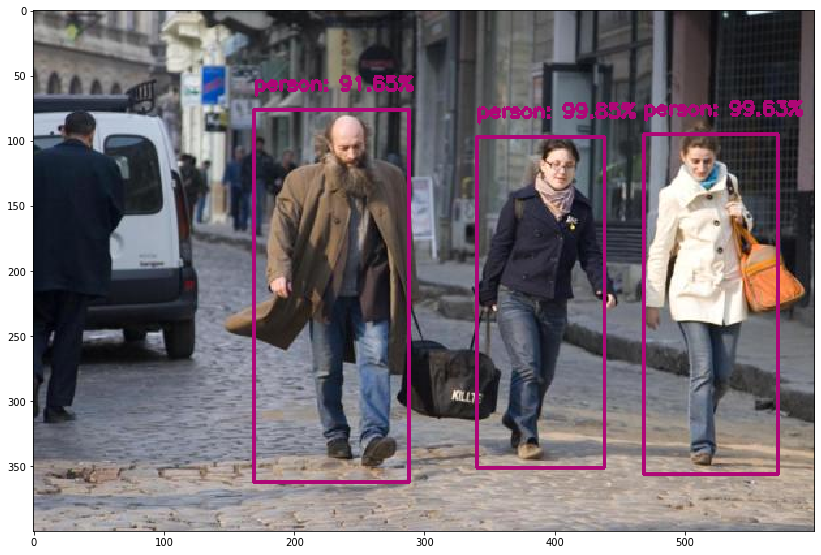

In [17]:
plt.figure(figsize=(14, 10));
plt.imshow(image[:,:,::-1]);